https://colab.research.google.com/drive/1fTBX7-fI6pyLPk3mMNdhP5gUcMeaef3f?authuser=1#scrollTo=1uzd4DpDG--J

https://colab.research.google.com/drive/1U513UUXfRY5o2ZXs82kgFaG6lZhdUbji?authuser=1#scrollTo=0-z_WkeNzz5s

https://chatgpt.com/share/68336d34-11e4-8011-b2bf-9928639d3cb2

In [1]:
# pip install beautifulsoup4

In [2]:
# pip install lxml

In [15]:
# pip install requests

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_distribuicao_faixa_etaria(df, coluna):
    plt.figure(figsize=(15, 6))
    coluna_foco = coluna

    if coluna == 'Idade':
        def classificar_idade(idade):
            if idade <= 11:
                return 'Infância <= 11'
            elif idade <= 17:
                return 'Adolescência 12 - 17'
            elif idade <= 29:
                return 'Adulto jovem 18 - 29'
            elif idade <= 59:
                return 'Adulto 30 - 59'
            else:
                return 'Idoso >= 60'

        coluna_foco = 'Faixa Etária'
        df[coluna_foco] = df[coluna].apply(classificar_idade)
        ordem_faixas = ['Infância <= 11', 'Adolescência 12 - 17',
                        'Adulto jovem 18 - 29', 'Adulto 30 - 59', 'Idoso >= 60']
        contagem = df[coluna_foco].value_counts().reindex(ordem_faixas)
        porcentagem = df[coluna_foco].value_counts(normalize=True).reindex(ordem_faixas) * 100
    else:
        contagem = df[coluna_foco].value_counts()
        porcentagem = df[coluna_foco].value_counts(normalize=True) * 100

    # Preparar DataFrame para plotagem
    df_plot = porcentagem.reset_index()
    df_plot.columns = [coluna_foco, 'Porcentagem']
    contagem = contagem.values

    # Gráfico de barras
    sns.barplot(x=coluna_foco, y='Porcentagem', data=df_plot, color='skyblue')

    # Linha com marcadores
    sns.lineplot(x=np.arange(len(df_plot)), y='Porcentagem', data=df_plot, color='blue', marker='o')

    # Anotações nos pontos
    for i, (abs_val, pct) in enumerate(zip(contagem, df_plot['Porcentagem'])):
        plt.text(i, pct + 0.5, f'{abs_val}\n{pct:.1f}%', ha='center', va='bottom', fontsize=10)

    # Ajustes visuais
    plt.title(f'Distribuição percentual por {coluna_foco}', fontsize=14)
    plt.ylabel('Porcentagem (%)')
    plt.xlabel(coluna_foco)
    plt.ylim(0, max(df_plot['Porcentagem']) + 10)

    # Rotacionar rótulos se muitos
    if len(df_plot[coluna_foco]) > 5:
        plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()


## Desafio
### Desenvolver solução baseada em dados para identificar perfis de investidores para o produto <b>tesouro direto<b>

In [2]:
# pip install scikit-learn
# !pip install pyarrow
# !pip install seaborn


In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# import itables
# from itables import init_notebook_mode
# init_notebook_mode(all_interactive=True)

In [ ]:
dados_tesouro = pd.read_parquet("dados_tesouro.parquet")

In [5]:
dados_tesouro

Codigo do Investidor Data de Adesao   Estado Civil Genero  \
0                      208891     10/12/2009  Desquitado(a)      M   
1                      208892     10/12/2009  Desquitado(a)      M   
2                      208893     10/12/2009  Desquitado(a)      M   
3                      208894     10/12/2009    Solteiro(a)      F   
4                      208895     10/12/2009  Desquitado(a)      M   
...                       ...            ...            ...    ...   
1048570               2581599     16/11/2017    Solteiro(a)      M   
1048571               2581600     16/11/2017  Desquitado(a)      M   
1048572               2581601     16/11/2017  Desquitado(a)      M   
1048573               2581602     16/11/2017  Desquitado(a)      M   
1048574               2581603     16/11/2017    Solteiro(a)      M   

                                       Profissao  Idade UF do Investidor  \
0                                         OUTROS     57               SP   
1                         BANCARIO E ECONOMIÁRIO     41               SP   
2                                         OUTROS     42               PR   
3                                         OUTROS     43               SC   
4        APOSENTADO (EXCETO FUNCIONÁRIO PÚBLICO)     73               PR   
...                                          ...    ...              ...   
1048570                                   OUTROS     43               MG   
1048571                               EMPRESÁRIO     34               RO   
1048572            PROPRIETARIO DE MICROEMPRESAS     27               GO   
1048573                            ADMINISTRADOR     38               SC   
1048574                               ENGENHEIRO     32               SP   

        Cidade do Investidor Pais do Investidor Situacao da Conta  \
0                  SAO PAULO             BRASIL                 D   
1                  SAO PAULO             BRASIL                 D   
2                      CAMBE             BRASIL                 D   
3         BALNEARIO CAMBORIU             BRASIL                 D   
4                   LONDRINA             BRASIL                 D   
...                      ...                ...               ...   
1048570       BELO HORIZONTE             BRASIL                 D   
1048571          PORTO VELHO             BRASIL                 D   
1048572               RIALMA             BRASIL                 D   
1048573    SAO JOSE DO CEDRO             BRASIL                 D   
1048574            SAO PAULO             BRASIL                 D   

        Operou 12 Meses  
0                     N  
1                     N  
2                     N  
3                     N  
4                     N  
...                 ...  
1048570               N  
1048571               N  
1048572               N  
1048573               N  
1048574               N  

[1048575 rows x 11 columns]

In [6]:
dados_tesouro.Profissao.values

array(['OUTROS', 'BANCARIO E ECONOMIÁRIO', 'OUTROS', ...,
       'PROPRIETARIO DE MICROEMPRESAS', 'ADMINISTRADOR', 'ENGENHEIRO'],
      shape=(1048575,), dtype=object)

In [7]:
print(dados_tesouro[dados_tesouro['Situacao da Conta']=='D']['UF do Investidor'].value_counts().to_dict())

{'SP': 75299, 'RJ': 20817, 'MG': 18522, 'PR': 12098, 'RS': 9897, 'SC': 9192, 'BA': 7500, 'GO': 6395, 'DF': 5890, 'PE': 5044, 'CE': 4697, 'ES': 4063, 'MT': 3269, 'PA': 3122, 'AM': 2203, 'MA': 2163, 'MS': 2032, 'PB': 2024, 'RN': 1900, 'AL': 1458, 'SE': 1314, 'PI': 1266, 'RO': 1135, 'TO': 795, 'AP': 380, 'RR': 347, 'AC': 346}


### Existe alguma relação entre o IDH de um estado e o investimento em tesouro direto?

In [8]:
df_idh = pd.read_csv('./another_datas/idh_table.csv', sep='\t')
df_idh = df_idh[['UF', 'Estado', 'IDH-M 2021']]

# df_completo = dados_tesouro.merge(df_idh, left_on='UF do Investidor', right_on='UF', how='left')

In [9]:
df_count_investidor_idh = dados_tesouro.groupby('UF do Investidor').size().reset_index(name='Quantidade de Investidores')
# Garantir que as colunas estejam no mesmo formato
df_idh['UF'] = df_idh['UF'].str.strip().str.upper()
df_count_investidor_idh['UF do Investidor'] = df_count_investidor_idh['UF do Investidor'].str.strip().str.upper()
df_agrupado_com_idh = df_count_investidor_idh.merge(df_idh, left_on='UF do Investidor', right_on='UF', how='left')

df_agrupado_com_idh = df_agrupado_com_idh.sort_values(by="IDH-M 2021", ascending=False)
df_agrupado_com_idh_foco = df_agrupado_com_idh[['UF', 'Quantidade de Investidores', 'IDH-M 2021']]

In [10]:
df_agrupado_com_idh_foco

UF  Quantidade de Investidores  IDH-M 2021
6   DF                       27062       0.814
25  SP                      358606       0.806
23  SC                       48416       0.792
10  MG                      102055       0.774
22  RS                       54141       0.771
7   ES                       22050       0.771
17  PR                       64079       0.769
18  RJ                      107978       0.762
11  MS                       12012       0.742
8   GO                       32583       0.737
12  MT                       15816       0.736
5   CE                       26706       0.734
26  TO                        4516       0.731
19  RN                       11062       0.728
15  PE                       29393       0.719
0   AC                        2007       0.710
24  SE                        7275       0.702
2   AM                       11978       0.700
20  RO                        6359       0.700
21  RR                        1960       0.699
14  PB                       11267       0.698
4   BA                       42494       0.691
16  PI                        7036       0.690
13  PA                       18882       0.690
3   AP                        2140       0.688
1   AL                        8379       0.684
9   MA                       12323       0.676

In [11]:
dados_tesouro['Situacao da Conta'].value_counts()

print(f"Estado com mais contas Ativadas: ")
print(f"Estado com mais contas desativadas: ")

Estado com mais contas Ativadas: 
Estado com mais contas desativadas: 


In [12]:
min_val_idade = dados_tesouro.Idade.min()
max_val_idade = dados_tesouro.Idade.max()
ind_max_val_idade = dados_tesouro.Idade.idxmax()
print("Valor minimo de idade: ", min_val_idade)
print("Valor maximo de idade: ", max_val_idade)
print("Index do valor maximo de idade: ", ind_max_val_idade)

Valor minimo de idade:  0
Valor maximo de idade:  118
Index do valor maximo de idade:  553788


In [13]:
print(f"DADOS IDADE MAXIMA:------------------\n{dados_tesouro.loc[dados_tesouro['Idade'].idxmax()]}")
print("------------------------------------")
print(f"DADOS IDADE MINIMA:-----------------\n{dados_tesouro.loc[dados_tesouro['Idade'].idxmin()]}")
# len(dados_tesouro)
# dados_tesouro.describe()
# dados_tesouro['Profissao'].value_counts().describe()
# dados_tesouro.info()

DADOS IDADE MAXIMA:------------------
Codigo do Investidor         31375524
Data de Adesao             28/03/2022
Estado Civil            Divorciado(a)
Genero                              M
Profissao                      OUTROS
Idade                             118
UF do Investidor                   SC
Cidade do Investidor          PALHOCA
Pais do Investidor             BRASIL
Situacao da Conta                   A
Operou 12 Meses                     N
Name: 553788, dtype: object
------------------------------------
DADOS IDADE MINIMA:-----------------
Codigo do Investidor       53357160
Data de Adesao           19/06/2024
Estado Civil            Solteiro(a)
Genero                            F
Profissao                 ESTUDANTE
Idade                             0
UF do Investidor                 PE
Cidade do Investidor         RECIFE
Pais do Investidor           BRASIL
Situacao da Conta                 A
Operou 12 Meses                   N
Name: 1040662, dtype: object


### QUAIS SÃO AS IDADES E COMO ESTA DISTRIBUIDO O DATASET COM RELACAO AO INVESTIMENTO EM TESOURO DIRETO?

In [14]:
# Definindo grupos
def classificar_idade(idade):
    if idade <= 11:
        return 'Infância <= 11'
    elif idade <= 17:
        return 'Adolescência 12 - 17'
    elif idade <= 29:
        return 'Adulto jovem 18 - 29'
    elif idade <= 59:
        return 'Adulto 30 - 59'
    else:
        return 'Idoso >= 60'

# Criando uma nova coluna com os grupos
dados_tesouro['Faixa Etária'] = dados_tesouro['Idade'].apply(classificar_idade)
porcentagens = dados_tesouro['Faixa Etária'].value_counts(normalize=True) * 100

print(porcentagens)

Faixa Etária
Adulto 30 - 59          65.996710
Adulto jovem 18 - 29    26.605822
Idoso >= 60              7.071693
Infância <= 11           0.167847
Adolescência 12 - 17     0.157929
Name: proportion, dtype: float64


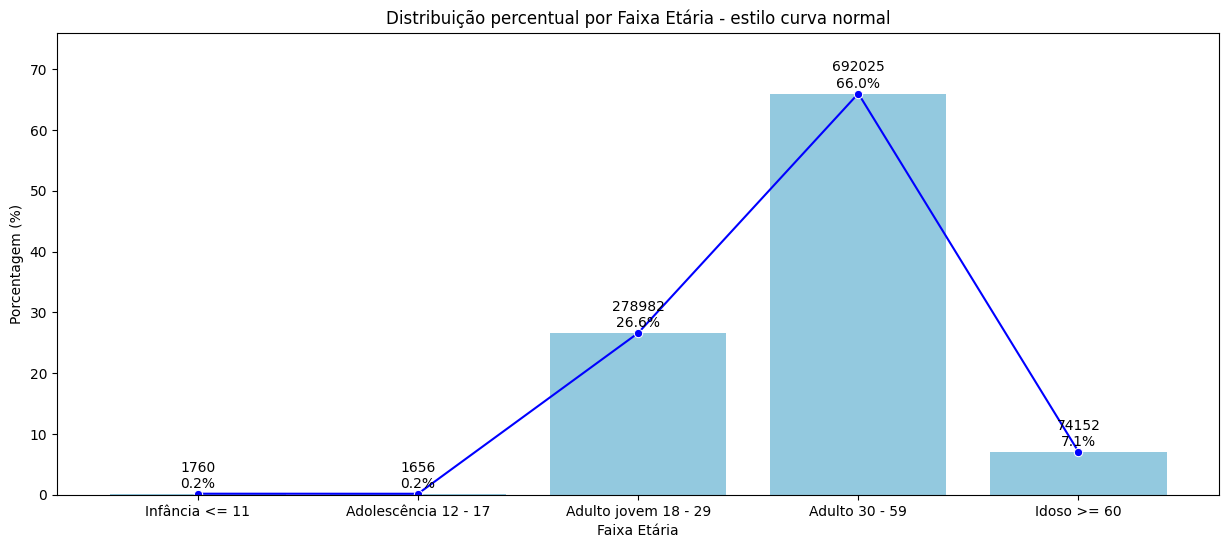

In [ ]:
plot_distribuicao_faixa_etaria(dados_tesouro, 'Idade')

### Qual o estado com o maior numeros de pessoas que investem em tesouro direto? 

In [16]:
print(dados_tesouro['UF do Investidor'].value_counts().to_dict())

{'SP': 358606, 'RJ': 107978, 'MG': 102055, 'PR': 64079, 'RS': 54141, 'SC': 48416, 'BA': 42494, 'GO': 32583, 'PE': 29393, 'DF': 27062, 'CE': 26706, 'ES': 22050, 'PA': 18882, 'MT': 15816, 'MA': 12323, 'MS': 12012, 'AM': 11978, 'PB': 11267, 'RN': 11062, 'AL': 8379, 'SE': 7275, 'PI': 7036, 'RO': 6359, 'TO': 4516, 'AP': 2140, 'AC': 2007, 'RR': 1960}


### Qual o genero mais presente no dataset?

In [17]:
dados_tesouro['Genero'].value_counts()

Genero
M    733023
F    311434
N      4118
Name: count, dtype: int64

### Criando agrupamento de idades para facilitar o entendimento do modelo

In [18]:
profissoes_agrupadas = {
    "Outros": [
        "OUTROS", "Não se aplica", "FALECIDO", "PROFISSIONAL LIBERAL", 'TRABALHADOR AUTÔNOMO'
    ],
    "Aposentados e Pensionistas": [
        "APOSENTADO (EXCETO FUNCIONÁRIO PÚBLICO)",
        "FUNCIONÁRIO PÚBLICO CIVIL APOSENTADO",
        "MILITAR REFORMADO", "PENSIONISTA"
    ],
    "Estudantes e Bolsistas": [
        "BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS", "ESTUDANTE"
    ],
    "Funcionários Públicos": [
        "SERVIDOR PÚBLICO FEDERAL", "SERVIDOR PÚBLICO MUNICIPAL", "SERVIDO PÚBLICO ESTADUAL",
        "FUNCIONÁRIO PÚBLICO CIVIL APOSENTADO",
        "OCUPANTE DE CARGO DE DIREÇAO E ASSESSORAMENTO SUPERIOR",
        "OCUPANTE DE CARGO DE DIREÇAO E ASSESSORAMENTO INTERMEDIÁRIO",
        "MEMBRO DO PODER JUDICIÁRIO: MINISTRO DE TRIB. SUPERIOR",
        "MEMBRO DO PODER LEGISLATIVO: SENADOR, DEP.FED.E ESTADUAL",
        "MEMBRO DO PODER EXECUTIVO: PRES.REPÚBLICA, MINISTRO ETC.",
        "DELEGADO DE POLÍCIA", "FISCAL"
    ],
    "Profissionais da Saúde": [
        "MÉDICO", "ODONTÓLOGO E DENTISTA", "ENFERMEIRO E NUTRICIONISTA",
        "FISIOTERAPEUTA E TERAPEUTA OCUPACIONAL", "FARMACÊUTICO", "FONOAUDIÓLOGO",
        "PSICÓLOGO", "BIÓLOGO E BIOMÉDICO", "TÉCNICO DE LABORATÓRIO E RAIO X", 'PROTÉTICO', 'VETERINÁRIO E ZOOTECNISTA'
    ],
    "Engenharia e Tecnologia": [
        "ENGENHEIRO", "TÉCNICO DE MECÂNICA", "TÉCNICO DE ELETRICIDADE, ELETRÔNICA E TELECOMUNICAÇÕES",
        "TÉCNICO DE QUÍMICA", "TÉCNICO DE CONTABILIDADE E DE ESTATÍSTICA",
        "TÉCNICO EM AGRONOMIA E AGRIMENSURA", "TECNOLOGO", "ANALISTA DE SISTEMAS", 'ARQUITETO',
        'TECNÓLOGO'
    ],
    "Direito e Justiça": [
        "ADVOGADO", "PROCURADOR E ASSEMELHADOS", "SERVENTUÁRIO DE JUSTIÇA", "TABELIÃO"
    ],
    "Educação e Pesquisa": [
        "PROFESSOR DE ENSINO SUPERIOR", "PROFESSOR DE PRIMEIRO E SEGUNDO GRAUS",
        "DIRETOR DE ESTABELECIMENTO DE ENSINO",
        'BIBLIOTECÁRIO, ARQUIVISTA, MUSEÓLOGO E ARQUEÓLOGO', 'SOCIÓLOGO',
        'OUTROS TRABALHADORES DE NÍVEL SUPERIOR LIGADOS AO ENSINO'
    ],
    "Ciências Exatas e Humanas": [
        "ECONOMISTA", "SOCIOLOGO", "ESTATÍSTICO", "FÍSICO", "GEÓGRAFO", "GEÓLOGO",
        "ATUÁRIO E MATEMÁTICO"
    ],
    "Comércio e Vendas": [
        "VENDEDOR PRACISTA, REPRESENTANTE COMERCIAL, CAIXEIRO VIAJANTE",
        "VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA", "SECURITÁRIO",
        "CORRETOR DE IMÓVEIS, SEGUROS, TÍTULOS E VALORES",
        "FEIRANTE", "JORNALEIRO", "SUPERIOR, INSPETOR E AGENTE DE COMPRAS E VENDAS",'DEMONSTRADOR'
    ],
    "Artes, Comunicação e Entretenimento": [
        "JORNALISTA", "PUBLICITÁRIO", "COMUNICÓLOGO", "RELAÇÕES PÚBLICAS",
        "ATOR E DIRETOR DE ESPETÁCULOS PÚBLICOS", "CANTOR E COMPOSITOR", "MÚSICO",
        "LOCUTOR E COMENTARISTA DE RÁDIO E TELEVISÃO E RADIALISTA",
        "DESENHISTA COMERCIAL", "DESENHISTA TÉCNICO", "DESENHISTA INDUSTRIAL",
        "DECORADOR", "MODELO DE MODAS", "COREÓGRAFO E BAILARINO",
        "PROFISSIONAIS DE LETRAS E DE ARTES", "ESCULTOR, PINTOR E ASSEMELHADOS",
        "DIPLOMATA", "AGENCIADOR DE PROPAGANDA", "OPERADOR DE CÂMARA DE CINEMA E TELEVISÃO"
    ],
    "Administração e Negócios": [
        "ADMINISTRADOR", "GERENTE", "DIRETOR DE EMPRESAS", "COORDENADOR E SUPERVISOR",
        "CONSULTOR", "EMPRESÁRIO", "EMPRESÁRIO ARTÍSTICO E PRODUTOR DE ESPETÁCULOS PÚBLICOS"
    ],
    "Contabilidade e Finanças": [
        "BANCARIO E ECONOMIÁRIO", "CONTADOR", "TRABALHADOR DOS SERVIÇOS DE CONTABILIDADE, DE CAIXA"
    ],
    "Transportes e Logística": [
        "PILOTO DE AERONAVES", "MOTORISTA DE VEÍCULOS DE TRANSPORTE DE PASSAGEIROS",
        "MOTORISTA DE VEICULOS DE TRANSPORTE DE CARGA", "COMISSÁRIO DE BORDO",
        "MAQUINISTA E FOGUISTA DE EMBARCAÇÕES, LOCOMOTIVAS", "COMANDANTE DE EMBARCAÇOES",
        "CONTRAMESTRE DE EMBARCAÇÕES", 'MARINHEIRO E ASSEMELHADOS'
    ],
    "Trabalho Operacional e Técnicos": [
        "MECÂNICO DE MANUTENÇÃO DE VEÍCULOS AUTOMÓVEIS E MÁQUINAS",
        "ELETRICISTA E ASSEMELHADOS", "LANTERNEIRO E PINTOR DE VEÍCULOS METÁLICOS",
        "ELETRICISTA DE MANUTENÇÃO DE VEÍCULOS AUTOMOTORES MÁQUINAS",
        "MECANICO DE MANUTENÇÃO, MONTADOR, PREPARADOR, OPERADOR"
    ],
    "Serviços Gerais": [
        "AUXILIAR DE ESCRITÓRIO E ASSEMELHADOS", "AGENTE ADMINISTRATIVO",
        "PORTEIRO DE EDIFÍCIO, ASCENSORISTA, GARAGISTA E FAXINEIRO",
        "SECRETARIO, ESTENÓGRAFO, DATILÓGRAFO, RECEPCIONISTA,TELEF.",
        "EMPREGADO DOMÉSTICO", "AUXILIAR DE LABORATORIO", "GOVERNANTA DE HOTEL, CAMAREIRO, PORTEIRO, COZINHEIRO"
    ],
    "Religião e Assistência Social": [
        "SACERDOTE OU MEMBRO DE ORDENS OU SEITAS RELIGIOSAS", "ASSISTENTE SOCIAL"
    ],
    "Forças de Segurança e Defesa": [
        "MILITAR EM GERAL", "OFICIAIS DAS FORÇAS ARMADAS E FORÇAS AUXILIARES", "BOMBEIRO"
    ],
    "Proprietários e Renda Passiva": [
        "PROPRIETÁRIO DE ESTABELECIMENTO INDUSTRIAL",
        "PROPRIETÁRIO DE ESTABELECIMENTO COMERCIAL",
        "PROPRIETÁRIO DE ESTABELECIMENTO DE PRESTAÇÃO DE SERVIÇOS",
        "PROPRIETARIO DE MICROEMPRESAS",
        "PROPRIETÁRIO DE IMÓVEL (RECEBENDO RENDIMENTO DE ALUGUEL)",
        "PROPRIETÁRIO DE ESTABELECIMENTO AGRÍCOLA, DA PECUÁRIA",
        "CAPITALISTA, RECEBENDO RENDIMENTO DE APLICAÇÃO DE CAPITAL"
    ],
    "Trabalhadores Rurais e Agropecuários": [
        "TRABALHADOR AGRÍCOLA", "TRABALHADOR DA PECUÁRIA", "AGRONOMO",
        "TÉCNICO EM AGRONOMIA E AGRIMENSURA", "GARIMPEIRO", "TRABALHADOR FLORESTAL", 'TRABALHADOR DA PESCA'
    ],
    "Trabalho Industrial e Produção": [
        "TRABALHADOR DE CONSTRUÇÃO CIVIL", "TRABALHADOR METALÚRGICO E SIDERÚRGICO",
        "TRABALHADOR DE FABRICAÇÃO DE ROUPAS", "TRABALHADOR DE FABRICAÇÃO DE PRODUTOS DE BORRACHA E PLÁSTICO",
        "TRABALHADOR DE FABRICAÇÃO E PREPARAÇÃO DE ALIMENTOS BEBIDAS",
        "TRABALHADOR DE FABRICAÇÃO DE PRODUTOS TÊXTEIS", "TRABALHADOR DE USINAGEM E METAIS",
        "TRABALHADOR DE FABRICAÇÃO DE CALÇADOS E ARTEFATOS DE COURO",
        "TRABALHADOR DE FABRICAÇÃO DE PAPEL E PAPELÃO", "TRABALHADOR DE ARTES GRÁFICAS",
        "TRABALHADOR DE INSTALAÇÕES DE PROCESSAMENTO QUÍMICO",
        "TRABALHADOR DE TRATAMENTO DE FUMO E DE FABR. CIGARROS",
        "TRABALHADOR DE FABRICAÇÃO DE ARTEFATOS DE MADEIRA"
    ],
    "Serviços Específicos": [
        "CABELEIREIRO, BARBEIRO, MANICURE, PEDICURE, MAQUILADOR",
        "LEILOEIRO, AVALIADOR E ASSEMELHADOS", "DESPACHANTE, INCLUSIVE O ADUANEIRO",
        "AGENTE DE SERVIÇOS FUNERÁRIOS E EMBALSAMADOR", "AGENTE DE VIAGEM E GUIA DE TURISMO"
    ],
    "Ciências Naturais e Exatas": [
        "ASTRÔNOMO E METEOROLOGISTA", "QUIMICO", "TÉCNICO DE BIOLOGIA"
    ],
    "Artesanato e Joalheria": [
        "JOALHEIROS E OURIVES", "ALFAIATE"
    ],
    "Esporte": [
        "ATLETA PROFISSIONAL E TÉCNICO EM DESPORTOS"
    ],
    "Carga e Logística Manual": [
        "ESTIVADOR, CARREGADOR, EMBALADOR E ASSEMELHADOS"
    ],
    "Direção e Liderança": [
        "CHEFE INTERMEDIÁRIO", "MESTRE E CONTRAMESTRE"
    ]
}


In [19]:
# Primeiro, invertemos o dicionário: cada profissão vira uma chave apontando para sua área
profissao_para_grupo = {}
for grupo, profissoes in profissoes_agrupadas.items():
    for profissao in profissoes:
        profissao_para_grupo[profissao] = grupo

# Agora aplicamos isso no DataFrame
dados_tesouro['Grupo_Profissao'] = dados_tesouro['Profissao'].map(profissao_para_grupo)

In [20]:
macrogrupo_para_grupos = {
    'Economia, Negócios e Administração': [
        'Contabilidade e Finanças',
        'Administração e Negócios',
        'Comércio e Vendas',
        'Proprietários e Renda Passiva',
        'Direção e Liderança'
    ],
    'Serviços Públicos e Segurança': [
        'Funcionários Públicos',
        'Forças de Segurança e Defesa',
        'Religião e Assistência Social',
        'Direito e Justiça'
    ],
    'Educação, Ciência e Pesquisa': [
        'Educação e Pesquisa',
        'Ciências Naturais e Exatas',
        'Ciências Exatas e Humanas',
        'Estudantes e Bolsistas'
    ],
    'Saúde e Bem-estar': [
        'Profissionais da Saúde',
        'Aposentados e Pensionistas'
    ],
    'Engenharia, Tecnologia e Produção': [
        'Engenharia e Tecnologia',
        'Trabalho Industrial e Produção'
    ],
    'Arte, Cultura e Comunicação': [
        'Artes, Comunicação e Entretenimento',
        'Artesanato e Joalheria'
    ],
    'Serviços Gerais e Técnicos': [
        'Serviços Gerais',
        'Serviços Específicos',
        'Trabalho Operacional e Técnicos'
    ],
    'Transporte e Logística': [
        'Transportes e Logística',
        'Carga e Logística Manual'
    ],
    'Agricultura e Meio Rural': [
        'Trabalhadores Rurais e Agropecuários'
    ],
    'Esporte': [
        'Esporte'
    ],
    'Outros': [
        'Outros'
    ]
}

# 2. Mapeia o grupo para o macrogrupo
grupo_para_macrogrupo = {}
for macro, grupos in macrogrupo_para_grupos.items():
    for grupo in grupos:
        grupo_para_macrogrupo[grupo] = macro

# 3. Aplica os mapeamentos no DataFrame
dados_tesouro['Macrogrupo_Profissao'] = dados_tesouro['Grupo_Profissao'].map(grupo_para_macrogrupo)


In [21]:
dados_tesouro

Codigo do Investidor Data de Adesao   Estado Civil Genero  \
0                      208891     10/12/2009  Desquitado(a)      M   
1                      208892     10/12/2009  Desquitado(a)      M   
2                      208893     10/12/2009  Desquitado(a)      M   
3                      208894     10/12/2009    Solteiro(a)      F   
4                      208895     10/12/2009  Desquitado(a)      M   
...                       ...            ...            ...    ...   
1048570               2581599     16/11/2017    Solteiro(a)      M   
1048571               2581600     16/11/2017  Desquitado(a)      M   
1048572               2581601     16/11/2017  Desquitado(a)      M   
1048573               2581602     16/11/2017  Desquitado(a)      M   
1048574               2581603     16/11/2017    Solteiro(a)      M   

                                       Profissao  Idade UF do Investidor  \
0                                         OUTROS     57               SP   
1                         BANCARIO E ECONOMIÁRIO     41               SP   
2                                         OUTROS     42               PR   
3                                         OUTROS     43               SC   
4        APOSENTADO (EXCETO FUNCIONÁRIO PÚBLICO)     73               PR   
...                                          ...    ...              ...   
1048570                                   OUTROS     43               MG   
1048571                               EMPRESÁRIO     34               RO   
1048572            PROPRIETARIO DE MICROEMPRESAS     27               GO   
1048573                            ADMINISTRADOR     38               SC   
1048574                               ENGENHEIRO     32               SP   

        Cidade do Investidor Pais do Investidor Situacao da Conta  \
0                  SAO PAULO             BRASIL                 D   
1                  SAO PAULO             BRASIL                 D   
2                      CAMBE             BRASIL                 D   
3         BALNEARIO CAMBORIU             BRASIL                 D   
4                   LONDRINA             BRASIL                 D   
...                      ...                ...               ...   
1048570       BELO HORIZONTE             BRASIL                 D   
1048571          PORTO VELHO             BRASIL                 D   
1048572               RIALMA             BRASIL                 D   
1048573    SAO JOSE DO CEDRO             BRASIL                 D   
1048574            SAO PAULO             BRASIL                 D   

        Operou 12 Meses          Faixa Etária                Grupo_Profissao  \
0                     N        Adulto 30 - 59                         Outros   
1                     N        Adulto 30 - 59       Contabilidade e Finanças   
2                     N        Adulto 30 - 59                         Outros   
3                     N        Adulto 30 - 59                         Outros   
4                     N           Idoso >= 60     Aposentados e Pensionistas   
...                 ...                   ...                            ...   
1048570               N        Adulto 30 - 59                         Outros   
1048571               N        Adulto 30 - 59       Administração e Negócios   
1048572               N  Adulto jovem 18 - 29  Proprietários e Renda Passiva   
1048573               N        Adulto 30 - 59       Administração e Negócios   
1048574               N        Adulto 30 - 59        Engenharia e Tecnologia   

                       Macrogrupo_Profissao  
0                                    Outros  
1        Economia, Negócios e Administração  
2                                    Outros  
3                                    Outros  
4                         Saúde e Bem-estar  
...                                     ...  
1048570                              Outros  
1048571  Economia, Negócios e Administração  
1048572  Economia, Negócios e Administração  
10485

In [22]:
dados_tesouro.Macrogrupo_Profissao.value_counts()

Macrogrupo_Profissao
Outros                                341187
Economia, Negócios e Administração    242516
Engenharia, Tecnologia e Produção      97655
Serviços Públicos e Segurança          80684
Saúde e Bem-estar                      79130
Serviços Gerais e Técnicos             78176
Educação, Ciência e Pesquisa           77377
Arte, Cultura e Comunicação            22908
Transporte e Logística                 18871
Agricultura e Meio Rural                7623
Esporte                                 2448
Name: count, dtype: int64

# 1. Pré-processamento dos dados

## 1.1 Converter varaiveis categoricas em numericas, usando One-Hot Encoding ou Label Enconding
Ex.: Profissao, Estado Civil, Genero

In [23]:
len(dados_tesouro['UF do Investidor'].unique())

27

In [24]:
# # dados_tesouro_encoded = pd.get_dummies(dados_tesouro, columns=['Profissao', 'Estado Civil', 'Genero'], drop_first=True)
# dados_tesouro_encoded = dados_tesouro.copy()
# dados_tesouro_encoded = dados_tesouro_encoded.drop(columns=['Profissao', 'Estado Civil'])
# dados_tesouro_encoded = pd.get_dummies(dados_tesouro_encoded, columns=['Genero'])
# dados_tesouro_encoded = dados_tesouro_encoded.drop(columns=['Codigo do Investidor', 'Data de Adesao', 'UF do Investidor','Cidade do Investidor', 'Pais do Investidor'])

In [25]:
# dados_tesouro_encoded = pd.get_dummies(dados_tesouro, columns=['Profissao', 'Estado Civil', 'Genero'], drop_first=True)
dados_tesouro_encoded = dados_tesouro.copy()
dados_tesouro_encoded = pd.get_dummies(dados_tesouro_encoded, columns=['Genero', 'Pais do Investidor', 'UF do Investidor', 'Macrogrupo_Profissao', 'Estado Civil'])
dados_tesouro_encoded = dados_tesouro_encoded.drop(columns=['Codigo do Investidor', 'Data de Adesao', 'Cidade do Investidor', 'Grupo_Profissao', 'Faixa Etária', 'Profissao'])

In [26]:
dados_tesouro_encoded

Idade Situacao da Conta Operou 12 Meses  Genero_F  Genero_M  \
0           57                 D               N     False      True   
1           41                 D               N     False      True   
2           42                 D               N     False      True   
3           43                 D               N      True     False   
4           73                 D               N     False      True   
...        ...               ...             ...       ...       ...   
1048570     43                 D               N     False      True   
1048571     34                 D               N     False      True   
1048572     27                 D               N     False      True   
1048573     38                 D               N     False      True   
1048574     32                 D               N     False      True   

         Genero_N  Pais do Investidor_BRASIL  UF do Investidor_AC  \
0           False                       True                False   
1           False                       True                False   
2           False                       True                False   
3           False                       True                False   
4           False                       True                False   
...           ...                        ...                  ...   
1048570     False                       True                False   
1048571     False                       True                False   
1048572     False                       True                False   
1048573     False                       True                False   
1048574     False                       True                False   

         UF do Investidor_AL  UF do Investidor_AM  ...  \
0                      False                False  ...   
1                      False                False  ...   
2                      False                False  ...   
3                      False                False  ...   
4                      False                False  ...   
...                      ...                  ...  ...   
1048570                False                False  ...   
1048571                False                False  ...   
1048572                False                False  ...   
1048573                False                False  ...   
1048574                False                False  ...   

         Estado Civil_Casado(a) com brasileiro(a) nato(a)  \
0                                                   False   
1                                                   False   
2                                                   False   
3                                                   False   
4                                                   False   
...                                                   ...   
1048570                                             False   
1048571                                             False   
1048572                                             False   
1048573                                             False   
1048574                                             False   

         Estado Civil_Casado(a) com brasileiro(a) naturalizado(a)  \
0                                                    False          
1                                                    False          
2                                                    False          
3                                                    False          
4                                                    False          
...                                                    ...          
1048570                                              False          
1048571                                              False          
1048572                                              False          
1048573                                              False          
1048574                                              False          

         Estado Civil_Casado(a) com estrangeiro(a)  \
0 

## 1.2 Normalizar vaiveis numericas como Idade

In [27]:
dados_tesouro['Situacao da Conta'].unique()
dados_tesouro['Operou 12 Meses'].unique()

array(['N', 'S'], dtype=object)

In [28]:
scaler = MinMaxScaler()

dados_tesouro_encoded['Idade'] = scaler.fit_transform(dados_tesouro[['Idade']])
dados_tesouro_encoded = dados_tesouro_encoded.rename(columns={'Idade': 'Idade_normalizada'})

## 1.3 Converter "Operou 12 Meses" e "Situacao" da Conta para booleanos.

In [29]:
dados_tesouro_encoded['Operou 12 Meses'] = dados_tesouro['Operou 12 Meses'].map({'S': True, 'N': False})
dados_tesouro_encoded['Situacao da Conta'] = dados_tesouro['Situacao da Conta'].map({'A': True, 'D': False})

# dados_tesouro_encoded[['Situacao da Conta', 'Operou 12 Meses']] = dados_tesouro_encoded[['Situacao da Conta', 'Operou 12 Meses']].astype(float)

dados_tesouro_encoded = dados_tesouro_encoded.astype(float)


In [30]:
dados_tesouro_encoded

Idade_normalizada  Situacao da Conta  Operou 12 Meses  Genero_F  \
0                 0.483051                0.0              0.0       0.0   
1                 0.347458                0.0              0.0       0.0   
2                 0.355932                0.0              0.0       0.0   
3                 0.364407                0.0              0.0       1.0   
4                 0.618644                0.0              0.0       0.0   
...                    ...                ...              ...       ...   
1048570           0.364407                0.0              0.0       0.0   
1048571           0.288136                0.0              0.0       0.0   
1048572           0.228814                0.0              0.0       0.0   
1048573           0.322034                0.0              0.0       0.0   
1048574           0.271186                0.0              0.0       0.0   

         Genero_M  Genero_N  Pais do Investidor_BRASIL  UF do Investidor_AC  \
0             1.0       0.0                        1.0                  0.0   
1             1.0       0.0                        1.0                  0.0   
2             1.0       0.0                        1.0                  0.0   
3             0.0       0.0                        1.0                  0.0   
4             1.0       0.0                        1.0                  0.0   
...           ...       ...                        ...                  ...   
1048570       1.0       0.0                        1.0                  0.0   
1048571       1.0       0.0                        1.0                  0.0   
1048572       1.0       0.0                        1.0                  0.0   
1048573       1.0       0.0                        1.0                  0.0   
1048574       1.0       0.0                        1.0                  0.0   

         UF do Investidor_AL  UF do Investidor_AM  ...  \
0                        0.0                  0.0  ...   
1                        0.0                  0.0  ...   
2                        0.0                  0.0  ...   
3                        0.0                  0.0  ...   
4                        0.0                  0.0  ...   
...                      ...                  ...  ...   
1048570                  0.0                  0.0  ...   
1048571                  0.0                  0.0  ...   
1048572                  0.0                  0.0  ...   
1048573                  0.0                  0.0  ...   
1048574                  0.0                  0.0  ...   

         Estado Civil_Casado(a) com brasileiro(a) nato(a)  \
0                                                     0.0   
1                                                     0.0   
2                                                     0.0   
3                                                     0.0   
4                                                     0.0   
...                                                   ...   
1048570                                               0.0   
1048571                                               0.0   
1048572                                               0.0   
1048573                                               0.0   
1048574                                               0.0   

         Estado Civil_Casado(a) com brasileiro(a) naturalizado(a)  \
0                                                      0.0          
1                                                      0.0          
2                                                      0.0          
3                                                      0.0          
4                                                      0.0          
...                                                    ...          
1048570                                                0.0          
1048571                                                0.0          
1048572                                                0.0          
1048573                    

In [31]:
dados_tesouro_encoded.Idade_normalizada.iloc[553788]

np.float64(1.0)

## Analisar apenas um sample

In [32]:
from sklearn.metrics import pairwise_distances

# del dados_tesouro
df_features = dados_tesouro_encoded.copy().sample(n=100000, random_state=42)
# del dados_tesouro_encoded
# del dados_tesouro
import gc
gc.collect()


166

In [33]:
import psutil
process = psutil.Process()
print(f"Memória usada: {process.memory_info().rss / 1024 ** 2:.2f} MB")

mem = psutil.virtual_memory()
print(f"Memória total: {mem.total / 1024 ** 2:.2f} MB")
print(f"Memória disponível: {mem.available / 1024 ** 2:.2f} MB")
print(f"Uso de memória: {mem.percent:.2f}%")


Memória usada: 1110.84 MB
Memória total: 515788.58 MB
Memória disponível: 482243.45 MB
Uso de memória: 6.50%


# Tecnicas de clusterizacao

In [34]:
# Calcula a matriz de distância de Hamming
matriz_dist_hamming = pairwise_distances(df_features, metric='hamming')

print(matriz_dist_hamming)

[[0.         0.10909091 0.10909091 ... 0.12727273 0.09090909 0.05454545]
 [0.10909091 0.         0.10909091 ... 0.12727273 0.16363636 0.12727273]
 [0.10909091 0.10909091 0.         ... 0.18181818 0.14545455 0.07272727]
 ...
 [0.12727273 0.12727273 0.18181818 ... 0.         0.05454545 0.12727273]
 [0.09090909 0.16363636 0.14545455 ... 0.05454545 0.         0.09090909]
 [0.05454545 0.12727273 0.07272727 ... 0.12727273 0.09090909 0.        ]]


In [35]:
# import seaborn as sns
# import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# # 3. Plotar heatmap
# sns.heatmap(matriz_dist_hamming, annot=True, cmap='viridis', xticklabels=df_features.index, yticklabels=df_features.index)
# plt.title('Matriz de Distância (Hamming)')
# plt.xlabel('Cliente')
# plt.ylabel('Cliente')
# plt.show()

# 4. Clustering (ex: Agglomerative Clustering com 8 grupos)
clustering = AgglomerativeClustering(n_clusters=6, metric='precomputed', linkage='average')
labels = clustering.fit_predict(matriz_dist_hamming)

In [36]:
# Mostrar os grupos
df_features['Cluster'] = labels

## Teste 1: Redução de Dimensionalidade (com PCA ou t-SNE)

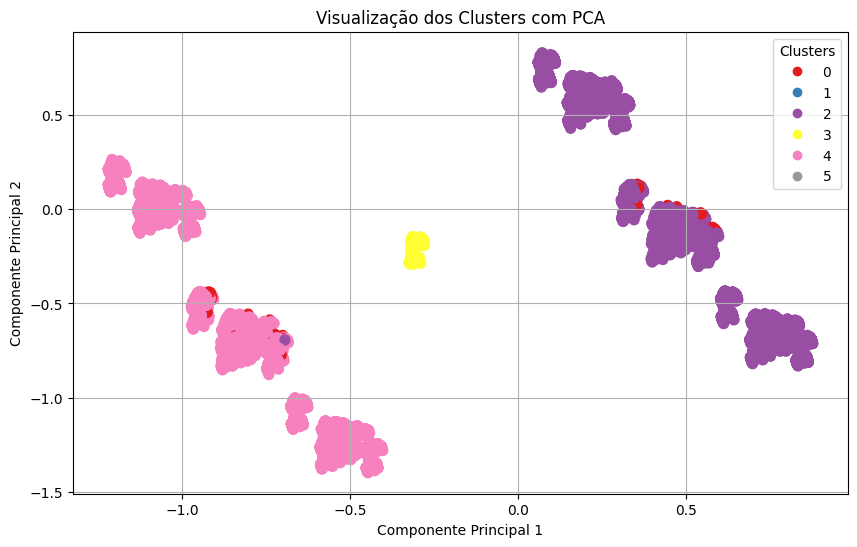

In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduz os dados para 2 dimensões
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_features.drop('Cluster', axis=1))

# Plota os clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_features['Cluster'], cmap='Set1', s=50)
plt.title('Visualização dos Clusters com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()


## Teste 2: Usar t-SNE para representação mais precisa (mais lento, mas melhor visual)

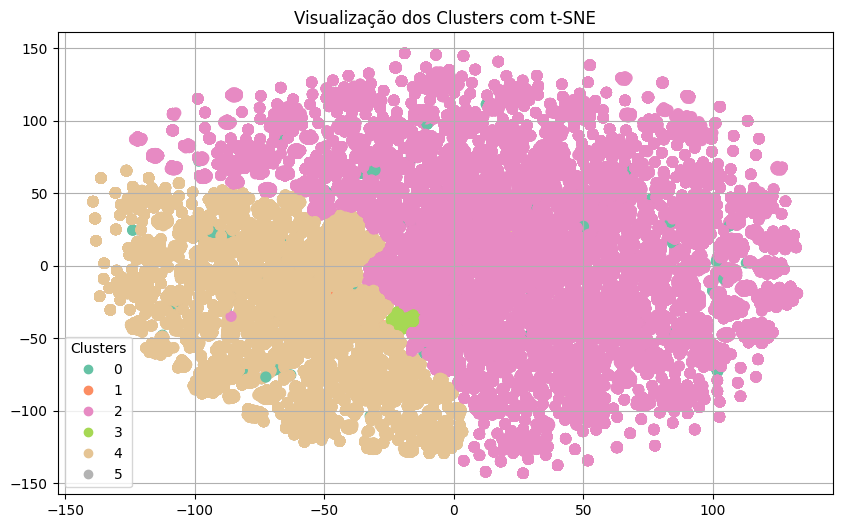

In [38]:
from sklearn.manifold import TSNE

# Reduz com t-SNE para visualização
tsne = TSNE(n_components=2, metric='hamming', perplexity=30, random_state=42)
df_tsne = tsne.fit_transform(df_features.drop('Cluster', axis=1))

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=df_features['Cluster'], cmap='Set2', s=50)
plt.title('Visualização dos Clusters com t-SNE')
# plt.xlabel('Dimensão 1')
# plt.ylabel('Dimensão 2')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()


### Analise dos clusters obtidos

In [39]:
clusters = df_features['Cluster']
tesouro_direto_sampled = dados_tesouro.loc[clusters.index].copy()
tesouro_direto_sampled['Cluster'] = clusters.values

In [52]:
tesouro_direto_sampled[tesouro_direto_sampled['Cluster']==3]

Codigo do Investidor Data de Adesao   Estado Civil Genero  \
246182               14177504     01/01/1900  Não se aplica      N   
87858                14796760     01/01/1900  Não se aplica      N   
80699                14829779     01/01/1900  Não se aplica      N   
196847               14907105     01/01/1900  Não se aplica      N   
1002864              13609415     01/01/1900  Não se aplica      N   
...                       ...            ...            ...    ...   
84736                14803698     01/01/1900  Não se aplica      N   
445886               14100335     01/01/1900  Não se aplica      N   
86929                14802275     01/01/1900  Não se aplica      N   
246842               14225307     01/01/1900  Não se aplica      N   
1002043              13625983     01/01/1900  Não se aplica      N   

             Profissao  Idade UF do Investidor Cidade do Investidor  \
246182   Não se aplica     56               RS               VIAMAO   
87858    Não se aplica     28               AM               MANAUS   
80699    Não se aplica     28               MG          DIVINOPOLIS   
196847   Não se aplica     37               SP      ITAQUAQUECETUBA   
1002864  Não se aplica     38               GO              GOIANIA   
...                ...    ...              ...                  ...   
84736    Não se aplica     43               RS         SAO LEOPOLDO   
445886   Não se aplica     24               SP  PRESIDENTE PRUDENTE   
86929    Não se aplica     41               SP            SAO PAULO   
246842   Não se aplica     45               RS              ERECHIM   
1002043  Não se aplica     48               SP           MOGI GUACU   

        Pais do Investidor Situacao da Conta Operou 12 Meses  \
246182              BRASIL                 D               N   
87858               BRASIL                 A               N   
80699               BRASIL                 A               N   
196847              BRASIL                 A               N   
1002864             BRASIL                 D               N   
...                    ...               ...             ...   
84736               BRASIL                 A               N   
445886              BRASIL                 D               N   
86929               BRASIL                 A               N   
246842              BRASIL                 D               N   
1002043             BRASIL                 A               N   

                 Faixa Etária Grupo_Profissao Macrogrupo_Profissao  Cluster  
246182         Adulto 30 - 59          Outros               Outros        3  
87858    Adulto jovem 18 - 29          Outros               Outros        3  
80699    Adulto jovem 18 - 29          Outros               Outros        3  
196847         Adulto 30 - 59          Outros               Outros        3  
1002864        Adulto 30 - 59          Outros               Outros        3  
...                       ...             ...                  ...      ...  
84736          Adulto 30 - 59          Outros               Outros        3  
445886   Adulto jovem 18 - 29          Outros               Outros        3  
86929          Adulto 30 - 59          Outros               Outros        3  
246842         Adulto 30 - 59          Outros               Outros        3  
1002043        Adulto 30 - 59          Outros               Outros        3  

[377 rows x 15 columns]

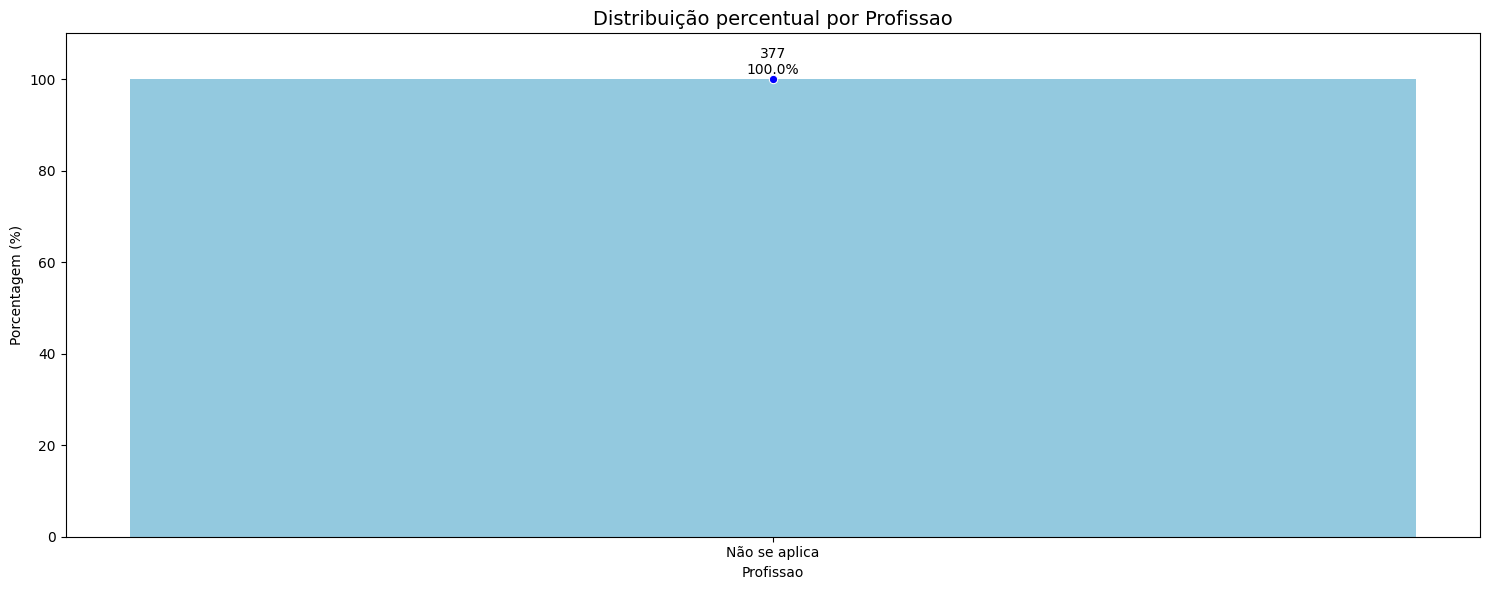

In [76]:
plot_distribuicao_faixa_etaria(tesouro_direto_sampled[tesouro_direto_sampled['Cluster']==3], 'Profissao')

## Teste 3 Clusterização KMEANS (Unsupervised Learning)

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

NUMBER_CLUSTERS = 6

In [42]:
test = df_features.drop('Cluster', axis=1)

# normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(test)

# clusterização
kmeans = KMeans(n_clusters=NUMBER_CLUSTERS, random_state=42)
test['cluster'] = kmeans.fit_predict(X_scaled)

### Redução de dimensionalidade para facilitar a visualização

In [43]:
# análise
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

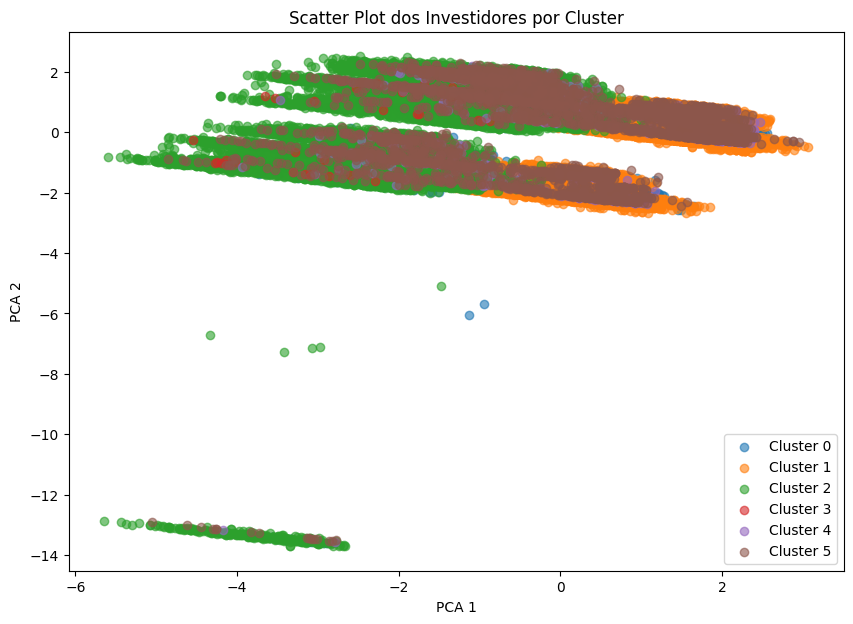

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

# Plotando cada cluster com uma cor diferente
for cluster in range(kmeans.n_clusters):
    plt.scatter(
        X_pca[test['cluster'] == cluster, 0],
        X_pca[test['cluster'] == cluster, 1],
        label=f'Cluster {cluster}',
        alpha=0.6
    )

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Scatter Plot dos Investidores por Cluster')
plt.legend()
plt.show()


In [45]:
import plotly.express as px

pca = PCA(n_components=3)
dados_pca = pca.fit_transform(X_scaled)

# Criar um novo DataFrame com os componentes
df_pca = pd.DataFrame(dados_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['Clusters'] = test['cluster'].values
# Plotar com Plotly Express
fig = px.scatter_3d(df_pca,
                    x='PC1', y='PC2', z='PC3',
                    color='Clusters',
                    title='Visualização PCA 3D dos Dados ESTBAN (Padronizados)',
                    labels={'PC1': 'Componente Principal 1',
                            'PC2': 'Componente Principal 2',
                            'PC3': 'Componente Principal 3'})
fig.show()

## Teste 4 - Analise utilizando MiniBatchKMeans e DBSCAN

In [46]:
from sklearn.cluster import MiniBatchKMeans
import pandas as pd

# Passo 1: Converter os dados booleanos para float
df_prepared = df_features.astype(float)

# Passo 2: Aplicar MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=6, batch_size=100000, random_state=42)
labels = kmeans.fit_predict(df_prepared)

# Passo 3: Adicionar os rótulos de cluster ao DataFrame
df_prepared['Cluster'] = labels

# Exibir os primeiros resultados
print(df_prepared['Cluster'].value_counts())


Cluster
1    29647
2    18470
4    15161
5    14610
0    14225
3     7887
Name: count, dtype: int64


In [47]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Amostragem para evitar estouro de memória
df_amostra = df_features.sample(n=100000, random_state=42).astype(float)

# Escalonamento (DBSCAN se beneficia disso)
df_scaled = StandardScaler().fit_transform(df_amostra)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(df_scaled)

# Adiciona os rótulos
df_amostra['Cluster'] = labels

# Mostra distribuição
print(df_amostra['Cluster'].value_counts())


Cluster
-1       10581
 15       3274
 7        2025
 58       1676
 35       1504
         ...  
 1682        4
 1673        4
 1440        4
 1604        4
 1595        3
Name: count, Length: 1692, dtype: int64


In [48]:
from sklearn.manifold import TSNE

# Reduz com t-SNE para visualização
tsne = TSNE(n_components=2, metric='hamming', perplexity=30, random_state=42)
df_tsne = tsne.fit_transform(df_amostra.drop('Cluster', axis=1))



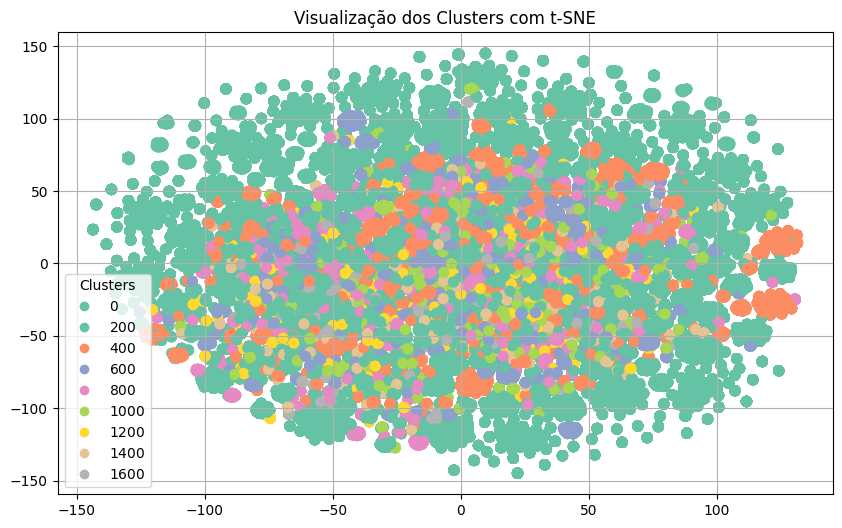

In [49]:
import matplotlib.pyplot as plt
# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=df_amostra['Cluster'], cmap='Set2', s=50)
plt.title('Visualização dos Clusters com t-SNE')
# plt.xlabel('Dimensão 1')
# plt.ylabel('Dimensão 2')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()

### Analise dos clusters obtidos

In [ ]:
clusters = df_features['Clusters']
